In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [23]:
dataset.head()

,Ad_1,Ad_2,Ad_3,Ad_4,Ad_5,Ad_6,Ad_7,Ad_8,Ad_9,Ad_10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
pandas_profiling.ProfileReport(dataset)

In [33]:
#Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n +1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_rewards = total_rewards + reward

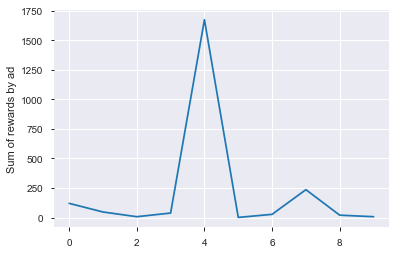

In [55]:
plt.plot(sums_of_rewards)
plt.ylabel('Sum of rewards by ad')
plt.show()

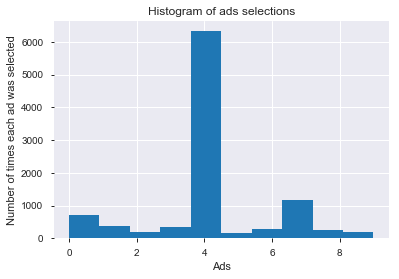

In [44]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [56]:
total_rewards

2178

In [42]:
sums_of_rewards

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [43]:
numbers_of_selections

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]